# Worksheet 4 - Scientific Visualization MVE080/MMG640
## Geospatial data

Name: Anu Peter

This is the fourth worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.



The code below loads the packages required for this homework.

In [118]:
import zipfile
import os
import jenkspy
import numpy as np
import pandas as pd
import geopandas as gpd
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 15 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

As the earth is not flat (and neither a [Möbius strip](https://en.wikipedia.org/wiki/M%C3%B6bius_strip)) when working with 2-dimensional maps we have to use a projection. Describe one scenario where it would not be suitable to use the Mercator's projection.

### Answer 1.1
One scenario where the Mercator projection would not be suitable for polar regions representation since the projection doesnot preserve area .This projection significantly distorts areas as we move toward the poles.Eg greenland will be shown bigger than africa in this projection.

### Question 1.2

A common form of visualization for maps is the Choropleth map (e.g slide 17 lecture 5). Briefly discuss two important aspects to consider when creating a choropleth map. 

### Answer 1.2
Two important aspects to consider when creating a choropleth map are adressing missing data and stantardizing naming schemes.

### Question 1.3

Sometimes to avoid area problems a more abstract map representation can be beneficial. Which abstract representation of Fig. 15.15 and Fig. 15.16 in the course book do you think work the best? Motivate!

### Answer 1.3
I prefer the cartogram heatmap, where each state is represented by a colored square (Figure 15.16) where it treats all states equally and doesn’t weigh them arbitrarily by their shape or size ,In Cartogram( Fig 15.15.) we can recognize individual states, but we also see the east coast states, Florida, and California have grown a lot in size, whereas the other western states and Alaska have collapsed,which is not the way to viasualize the data.In cartogram it can be avoided because in it each state is represented by an equally sized square, and the squares are arranged according to the approximate position of each state relative to the other states.Since we are interested in the median income, the shape or size of the state will only confuse us ,no importance to area is needed.

### Question 1.4

When creating a visual, what are three sources that often cause unwilling misleading?

### Answer 1.4
Three three sources that often cause unwilling misleading when creating a visual are wrong  map projection choice,inapropriate color representation of quantities and color map choices.


## Geospatial data  

For this part reading chapter 15 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help. You need to have **geopandas** installed for this part (it should be installed if you have used the yml-file on the webpage).

### Question 2.1

Let us take a closer look at Starbucks. Produce two visuals where i) you use dots and ii) where you use colors (here you can represent countries without Starbucks as white) to show the number of Starbucks stores in different Asian countries. 

*Hint - you can merge on iso_a3*

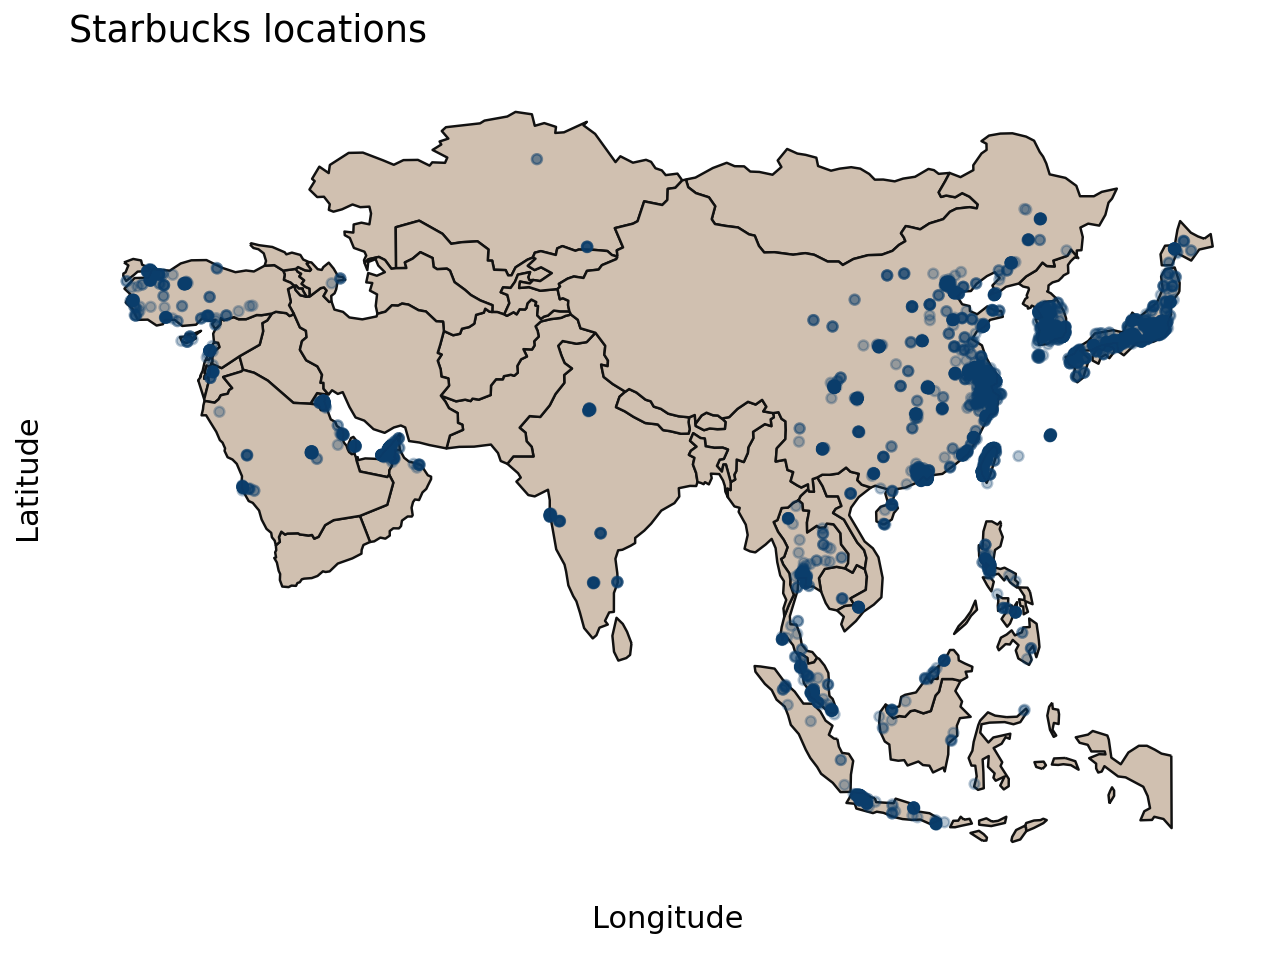

<Figure Size: (640 x 480)>

In [119]:
# Insert code here for visual 1
starbucks_stores = pd.read_csv('Starbucks_data-1.csv')
# Insert code here for visual 1
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
asia = world[world["continent"] == "Asia"]
col_highlight = ["#D0C0B0", "#0A3D6B", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0D5C3D", "#812F02"]
starbucks_stores = pd.read_csv('Starbucks_data-1.csv')
#merging with iso_a3 gives the desired dataset with the Starbucks dataset only for Asia.
starbucks_asia = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3")
p = (ggplot(asia)
    + geom_map(fill=col_highlight[0])

    + geom_point(data=starbucks_asia, mapping=aes(x='Longitude', y='Latitude'), color=col_highlight[1], alpha=0.3)
    + labs(title='Starbucks locations')
    + theme(panel_background=element_rect(fill = "white"),
            axis_ticks=element_blank(),
            axis_text=element_blank()))
p
# Remember to print the visual
# Remember to print the visual 

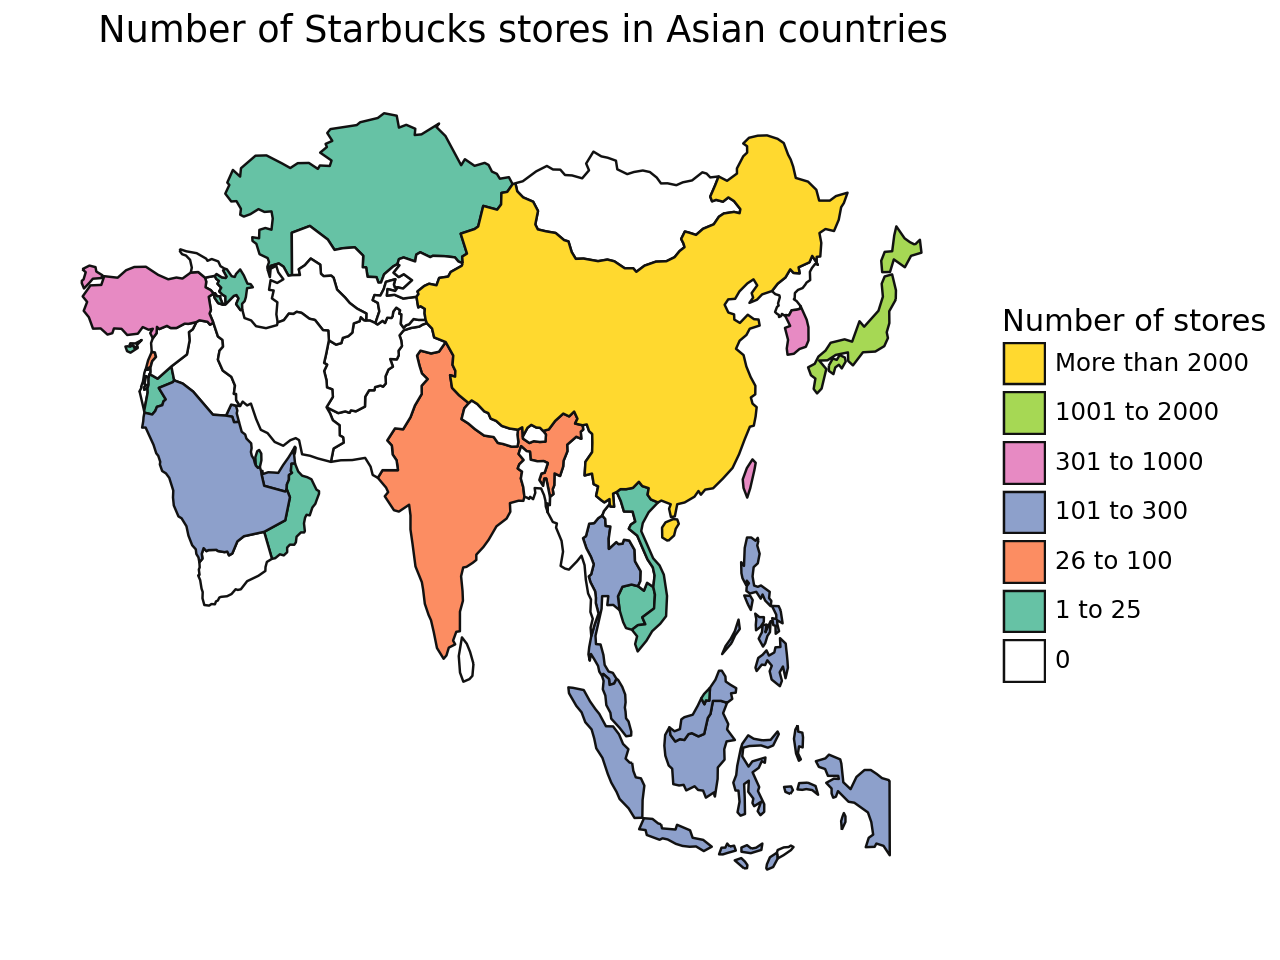

<Figure Size: (640 x 480)>

In [120]:
# Insert code here for visual 
#This is the important part - making the correct dataframe

all_iso_a3_asia = asia['iso_a3'].unique() #get all iso_a3 codes for all countries in Asia

all_iso_a3_asia_dataframe = pd.DataFrame({"iso_a3": all_iso_a3_asia}) #create a dataframe with all iso_a3 codes
                                                      #corresponding to Asian countries

starbucks_asia_count = starbucks_asia.copy() # add the counts to the dataframe

starbucks_asia_count = starbucks_asia.groupby("iso_a3").count()[["Store Name"]].rename(columns={"Store Name":"Count"})
starbucks_asia_count = starbucks_asia_count.reset_index()

# A merged dataframe that includes all Asian countries, the values for missing countries are NaN
starbucks_all_asia_counts = pd.merge(all_iso_a3_asia_dataframe, starbucks_asia_count, how="left", on="iso_a3")

starbucks_all_asia_counts["Count"].fillna(0, inplace=True) #replace missing countries' values
                                                           #with zeros

#starbucks_asia_merged = pd.merge(starbucks_all_asia_counts, starbucks_asia, how="left", on="iso_a3")

starbucks = pd.merge(asia, starbucks_all_asia_counts, on="iso_a3", how="left")






#Now we make the plot
col_use = ['#ffffff', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
starbucks["Count"] = starbucks["Count"].fillna(0)

#create the quantiles
quantile_val = np.quantile(starbucks["Count"], [0.5, 0.7, 0.7578, 0.893, 0.9572, 0.98935])

#define the condition for each quantile range
conditions = [
    (starbucks["Count"] == 0),
    (starbucks["Count"].ge(quantile_val[0]) & starbucks["Count"].lt(quantile_val[1])),
    (starbucks["Count"].ge(quantile_val[1]) & starbucks["Count"].lt(quantile_val[2])),
    (starbucks["Count"].ge(quantile_val[2]) & starbucks["Count"].lt(quantile_val[3])),
    (starbucks["Count"].ge(quantile_val[3]) & starbucks["Count"].lt(quantile_val[4])),
    (starbucks["Count"].ge(quantile_val[4]) & starbucks["Count"].lt(quantile_val[5])),
    starbucks["Count"].ge(quantile_val[5])
]
#define the respective choices
choices = [
    "0",
    f"{int(quantile_val[0]) + 1} to {int(quantile_val[1])}",
    f"{int(quantile_val[1]) + 1} to {int(quantile_val[2])}",
    f"{int(quantile_val[2]) + 1} to {int(quantile_val[3])}",
    f"{int(quantile_val[3]) + 1} to {int(quantile_val[4])}",
    f"{int(quantile_val[4]) + 1} to {int(quantile_val[5])}",
    f"More than {int(quantile_val[5])}"
]

#create a new column for categorical values
starbucks["N_count"] = pd.Categorical(np.select(conditions, choices), categories=choices[::-1])

p2 = (ggplot(starbucks)
    + geom_map(aes(fill="N_count"))
    + scale_fill_manual(values=col_use[::-1], name = "Number of stores")
    + labs(title = "     Number of Starbucks stores in Asian countries")
    + theme(panel_background=element_rect(fill = "white"),
            axis_ticks=element_blank(),
            axis_text=element_blank()))
p2
# Remember to print the visual 

## Question 2.2

On Canvas I have uploaded two datasets with percentage of a countries surface that is covered by forests in 1990 and 2019. Create a visual which clearly shows how forest coverage has changed between 1970 and 2019.

Motivate choice of projection!

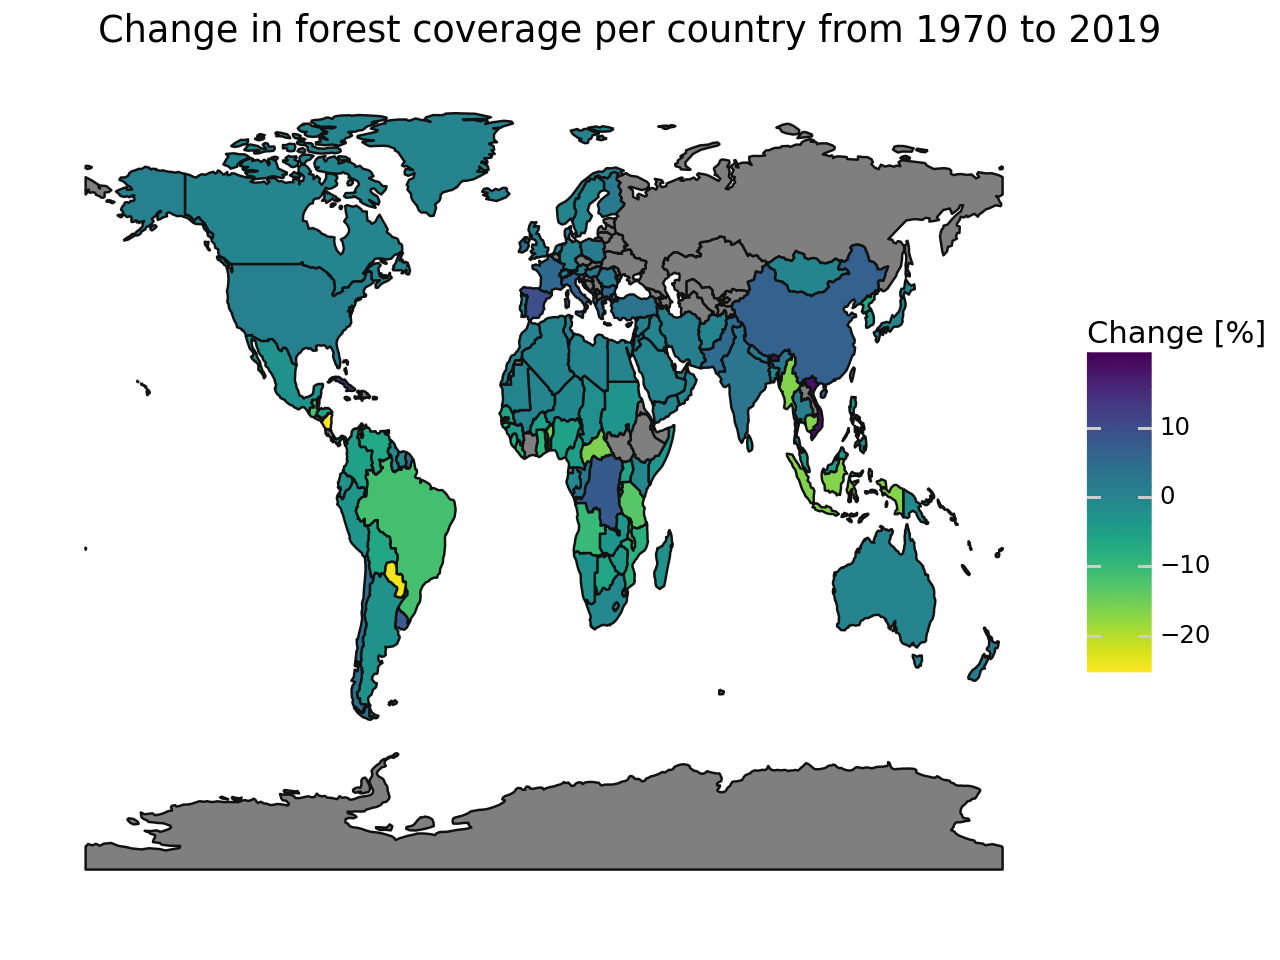

<Figure Size: (640 x 480)>

In [121]:

F_2019 = pd.read_csv('Forest_2019-1.csv')
F_1990 = pd.read_csv('Forest_1990-1.csv')

# Merge the two datasets
merged_df = pd.merge(F_1990, F_2019, on='Country', suffixes=('_1990', '_2019'))

# Create a new column for change in forest coverage
merged_df['Change'] = merged_df['2019_forest'] - merged_df['1990_forest']

# Load a world map shapefile
world = world.to_crs("EPSG:4326")
# Merge the world map with your forest coverage data
world = world.merge(merged_df, how='left', left_on='name', right_on='Country')

p = (ggplot(world)
    + geom_map(aes(fill='Change'))
    + scale_fill_cmap('viridis_r')
    + labs(title='     Change in forest coverage per country from 1970 to 2019', fill='Change [%]')
    + theme(panel_background=element_rect(fill = "white"),
            axis_ticks=element_blank(),
            axis_text=element_blank())
)
p

*Motivate choice of projection here*
We want to show the size of the forests on a map, and it's important that the area of the forests is represented accurately. "EPSG:4326" is not apt in the situation so to transform the spatial data to a coordinate reference system I have used WGS84 .It is a widely used geographic coordinate system with latitude and longitude values and gives better projection

## Question 2.3

On Canvas I have uploaded a dataset of ILI activity level, a measure used to monitor the flu activity in the USA. Visualize the activity level in the USA using a choropleth visual with discrete binning of the different categories (like slide 13 lecture 7). Produce two visuals with different binning schemes, motivate which one you think works the best for this data.

The code below helps you read the USA map.

In [122]:
# Read USA map and filter away Alaska, Hawaii and non-mainland territories
'''
map_USA = gpd.read_file("path_USA_map")
map_USA = map_USA.loc[map_USA["STUSPS"] != "VI"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "MP"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "GU"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "HI"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "AK"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "PR"]
'''

'\nmap_USA = gpd.read_file("path_USA_map")\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "VI"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "MP"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "GU"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "HI"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "AK"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "PR"]\n'

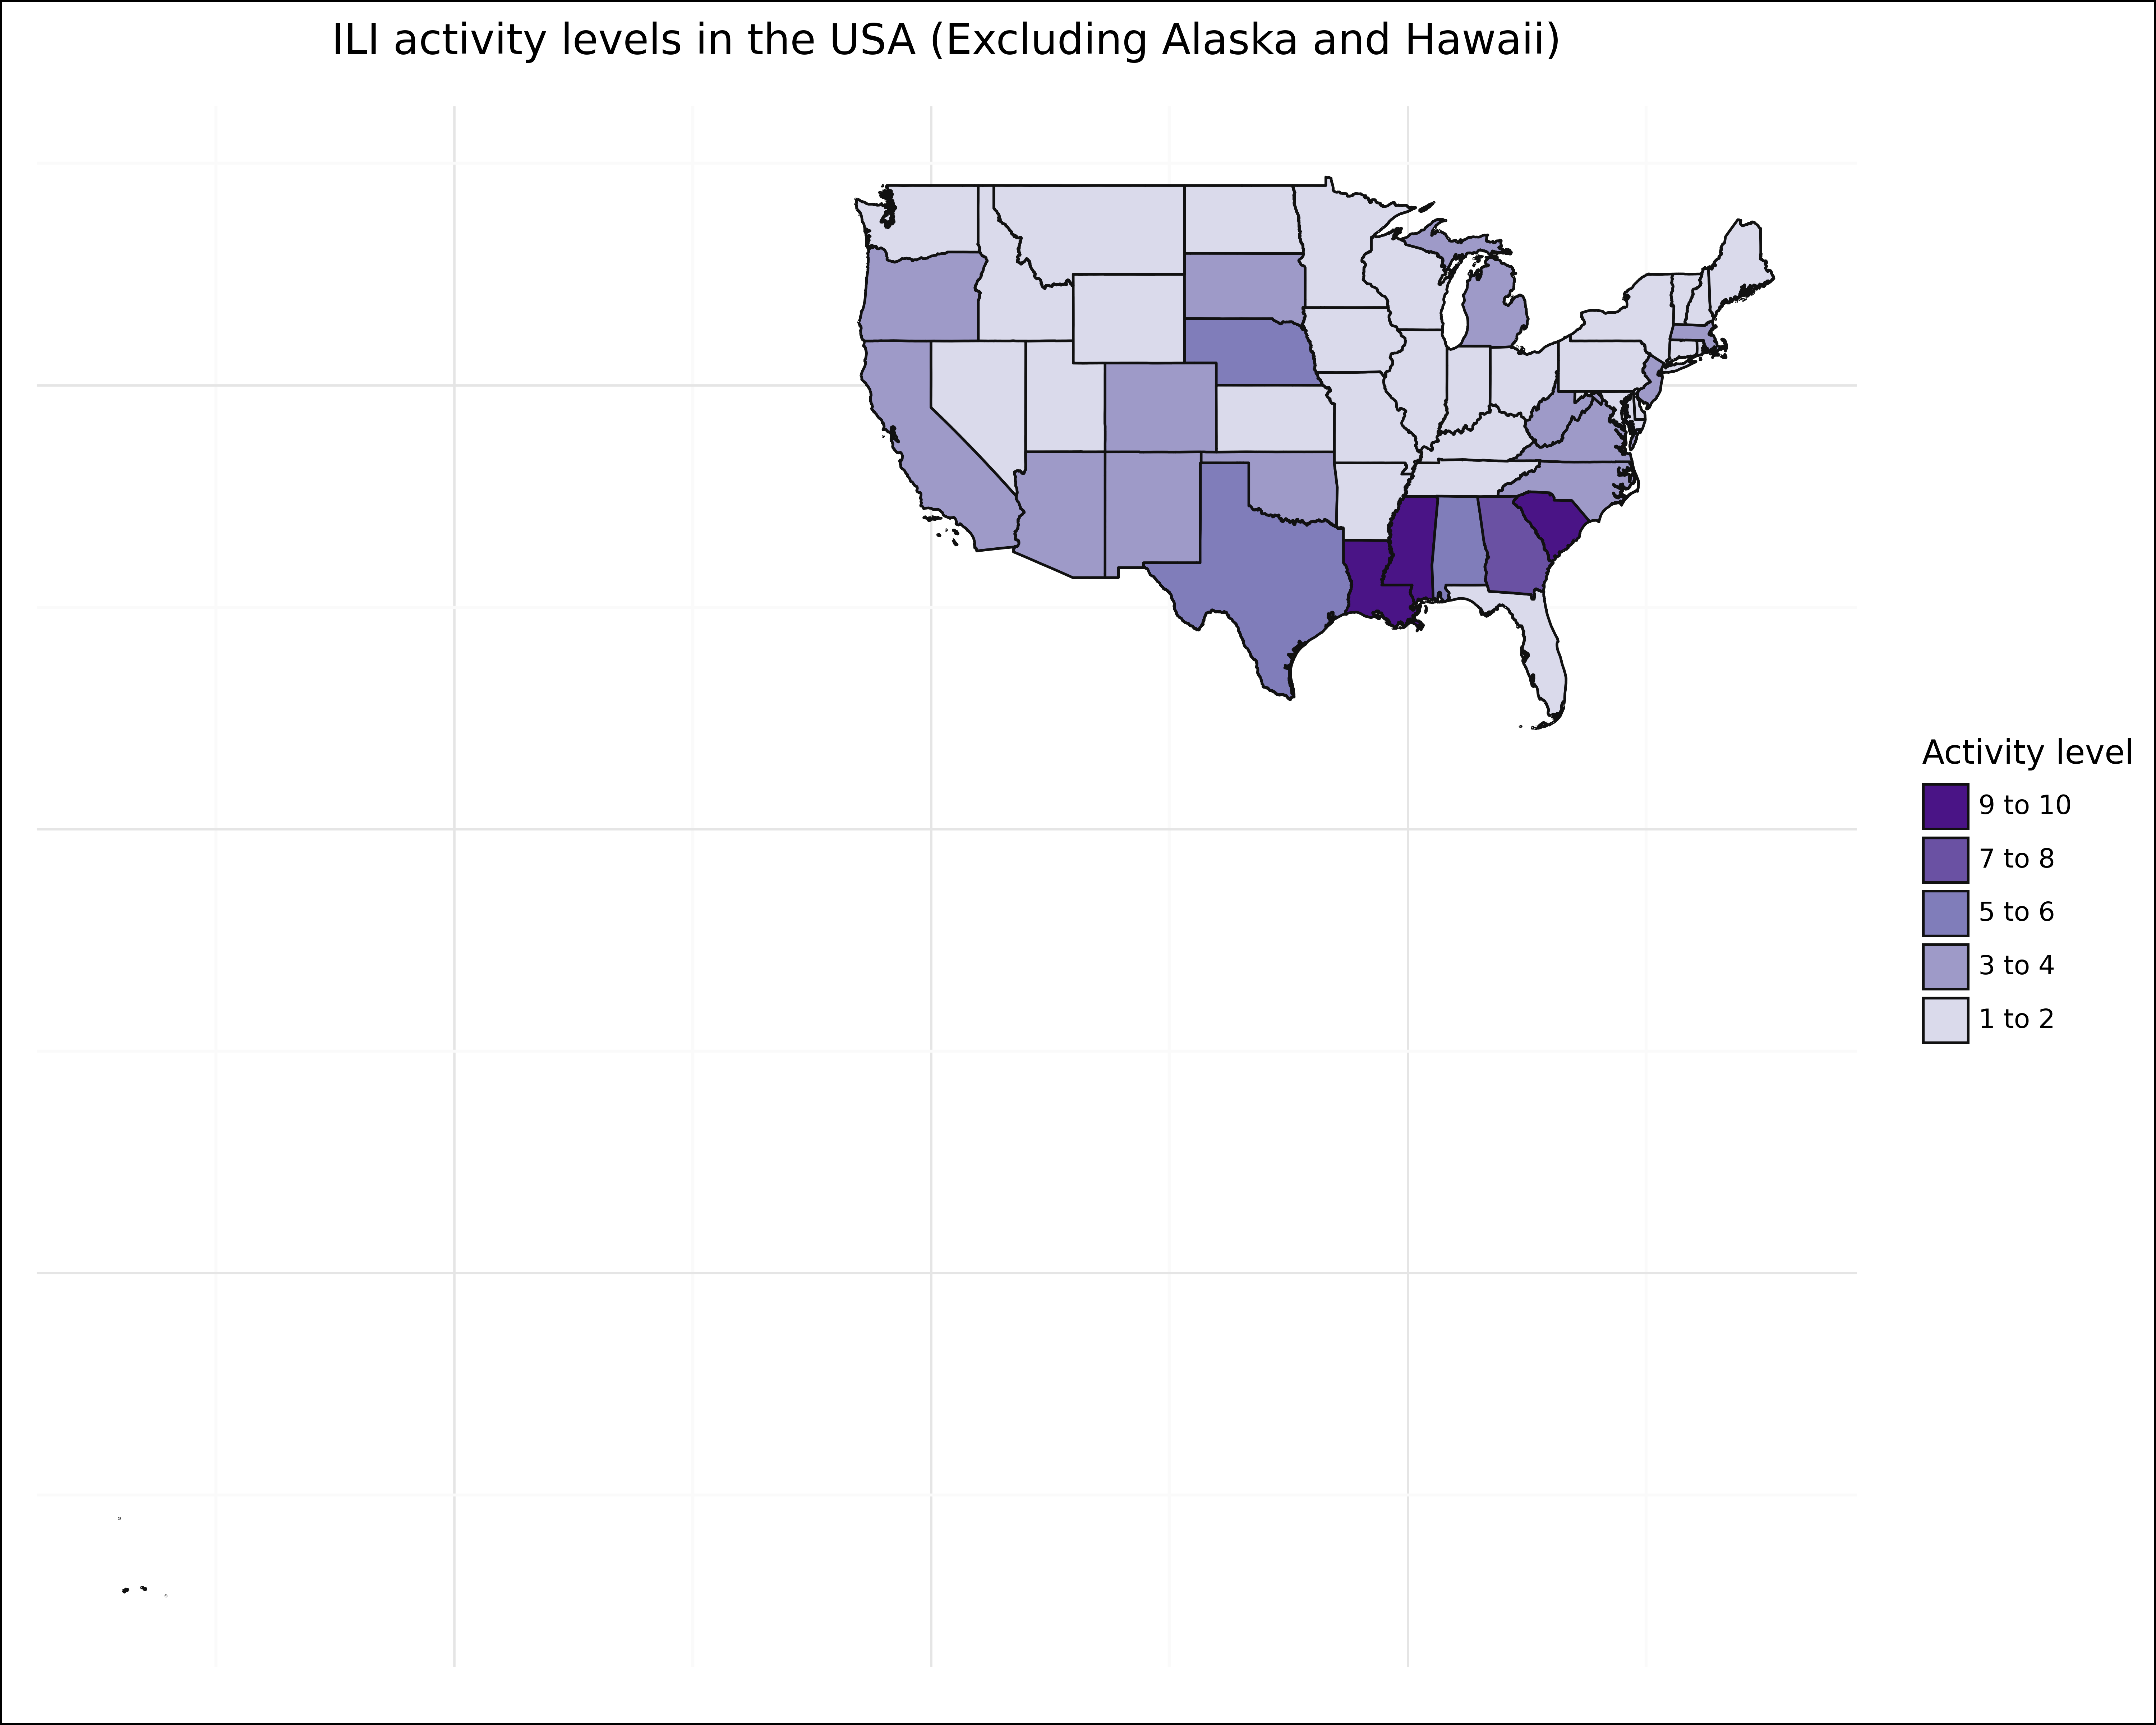

In [123]:

from plotnine import ggplot, aes, geom_map, scale_fill_manual, labs, theme_minimal, element_rect, element_blank

zip_file_path = 'cb_2018_us_state_500k-2.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    extraction_dir = 'path/to/extracted'
    zip_ref.extractall(extraction_dir)

# Specify the path to the shapefile (shp) within the extracted folder
shp_file_path = os.path.join(extraction_dir, 'cb_2018_us_state_500k.shp')

# Read the shapefile using geopandas
map_usa = gpd.read_file(shp_file_path)

# Filter out non-contiguous states
map_usa = map_usa.loc[~map_usa["STUSPS"].isin(["AK", "HI", "VI", "MP", "GU", "PR"])]

# Read ILI data
ili_data = pd.read_csv('FLU_data.csv')


map_usa['STUSPS'] = map_usa['STUSPS'].astype(str)
ili_data['statename'] = ili_data['statename'].astype(str)

# Merge ILI data with the US states GeoDataFrame
merged_data = pd.merge(map_usa, ili_data, left_on="NAME", right_on="statename", how="left")

# Fill NaN values in the 'activity_level' column with 0
merged_data["activity_level"] = merged_data["activity_level"].fillna(0)

# Visualize the data
class_size = 2

conditions = [
    merged_data["activity_level"].lt(class_size * 1 + 1),
    (merged_data["activity_level"].ge(class_size * 1 + 1) & merged_data["activity_level"].lt(class_size * 2 + 1)),
    (merged_data["activity_level"].ge(class_size * 2 + 1) & merged_data["activity_level"].lt(class_size * 3 + 1)),
    (merged_data["activity_level"].ge(class_size * 3 + 1) & merged_data["activity_level"].lt(class_size * 4 + 1)),
    (merged_data["activity_level"].ge(class_size * 4 + 1) & merged_data["activity_level"].lt(class_size * 5 + 1))
]

choices = ["1 to 2", "3 to 4", "5 to 6", "7 to 8", "9 to 10"]

merged_data["N_count"] = pd.Categorical(np.select(conditions, choices), categories=choices[::-1])
col_use = [ "#dadaeb", "#9e9ac8", "#807dba", "#6a51a3", "#4a1486"]
from plotnine import ggplot, aes, geom_map, scale_fill_manual, labs, theme_minimal, element_rect, element_blank, element_text

p1 = (
    ggplot(merged_data)
    + geom_map(aes(fill="N_count"))
    + scale_fill_manual(values=col_use[::-1], name="Activity level")
    + labs(title="ILI activity levels in the USA (Excluding Alaska and Hawaii)")
    + theme_minimal()
    + theme(
        panel_background=element_rect(fill="white"),
        axis_ticks=element_blank(),
        axis_text=element_blank(),
        axis_title=element_blank(),
        plot_title=element_text(size=14, hjust=0.5),
    )
)

# Adjust the visual size, position, and increase DPI
p1 = p1 + theme(figure_size=(10, 8), plot_background=element_rect(fill="white"), dpi=300)

# Print the plot
print(p1)






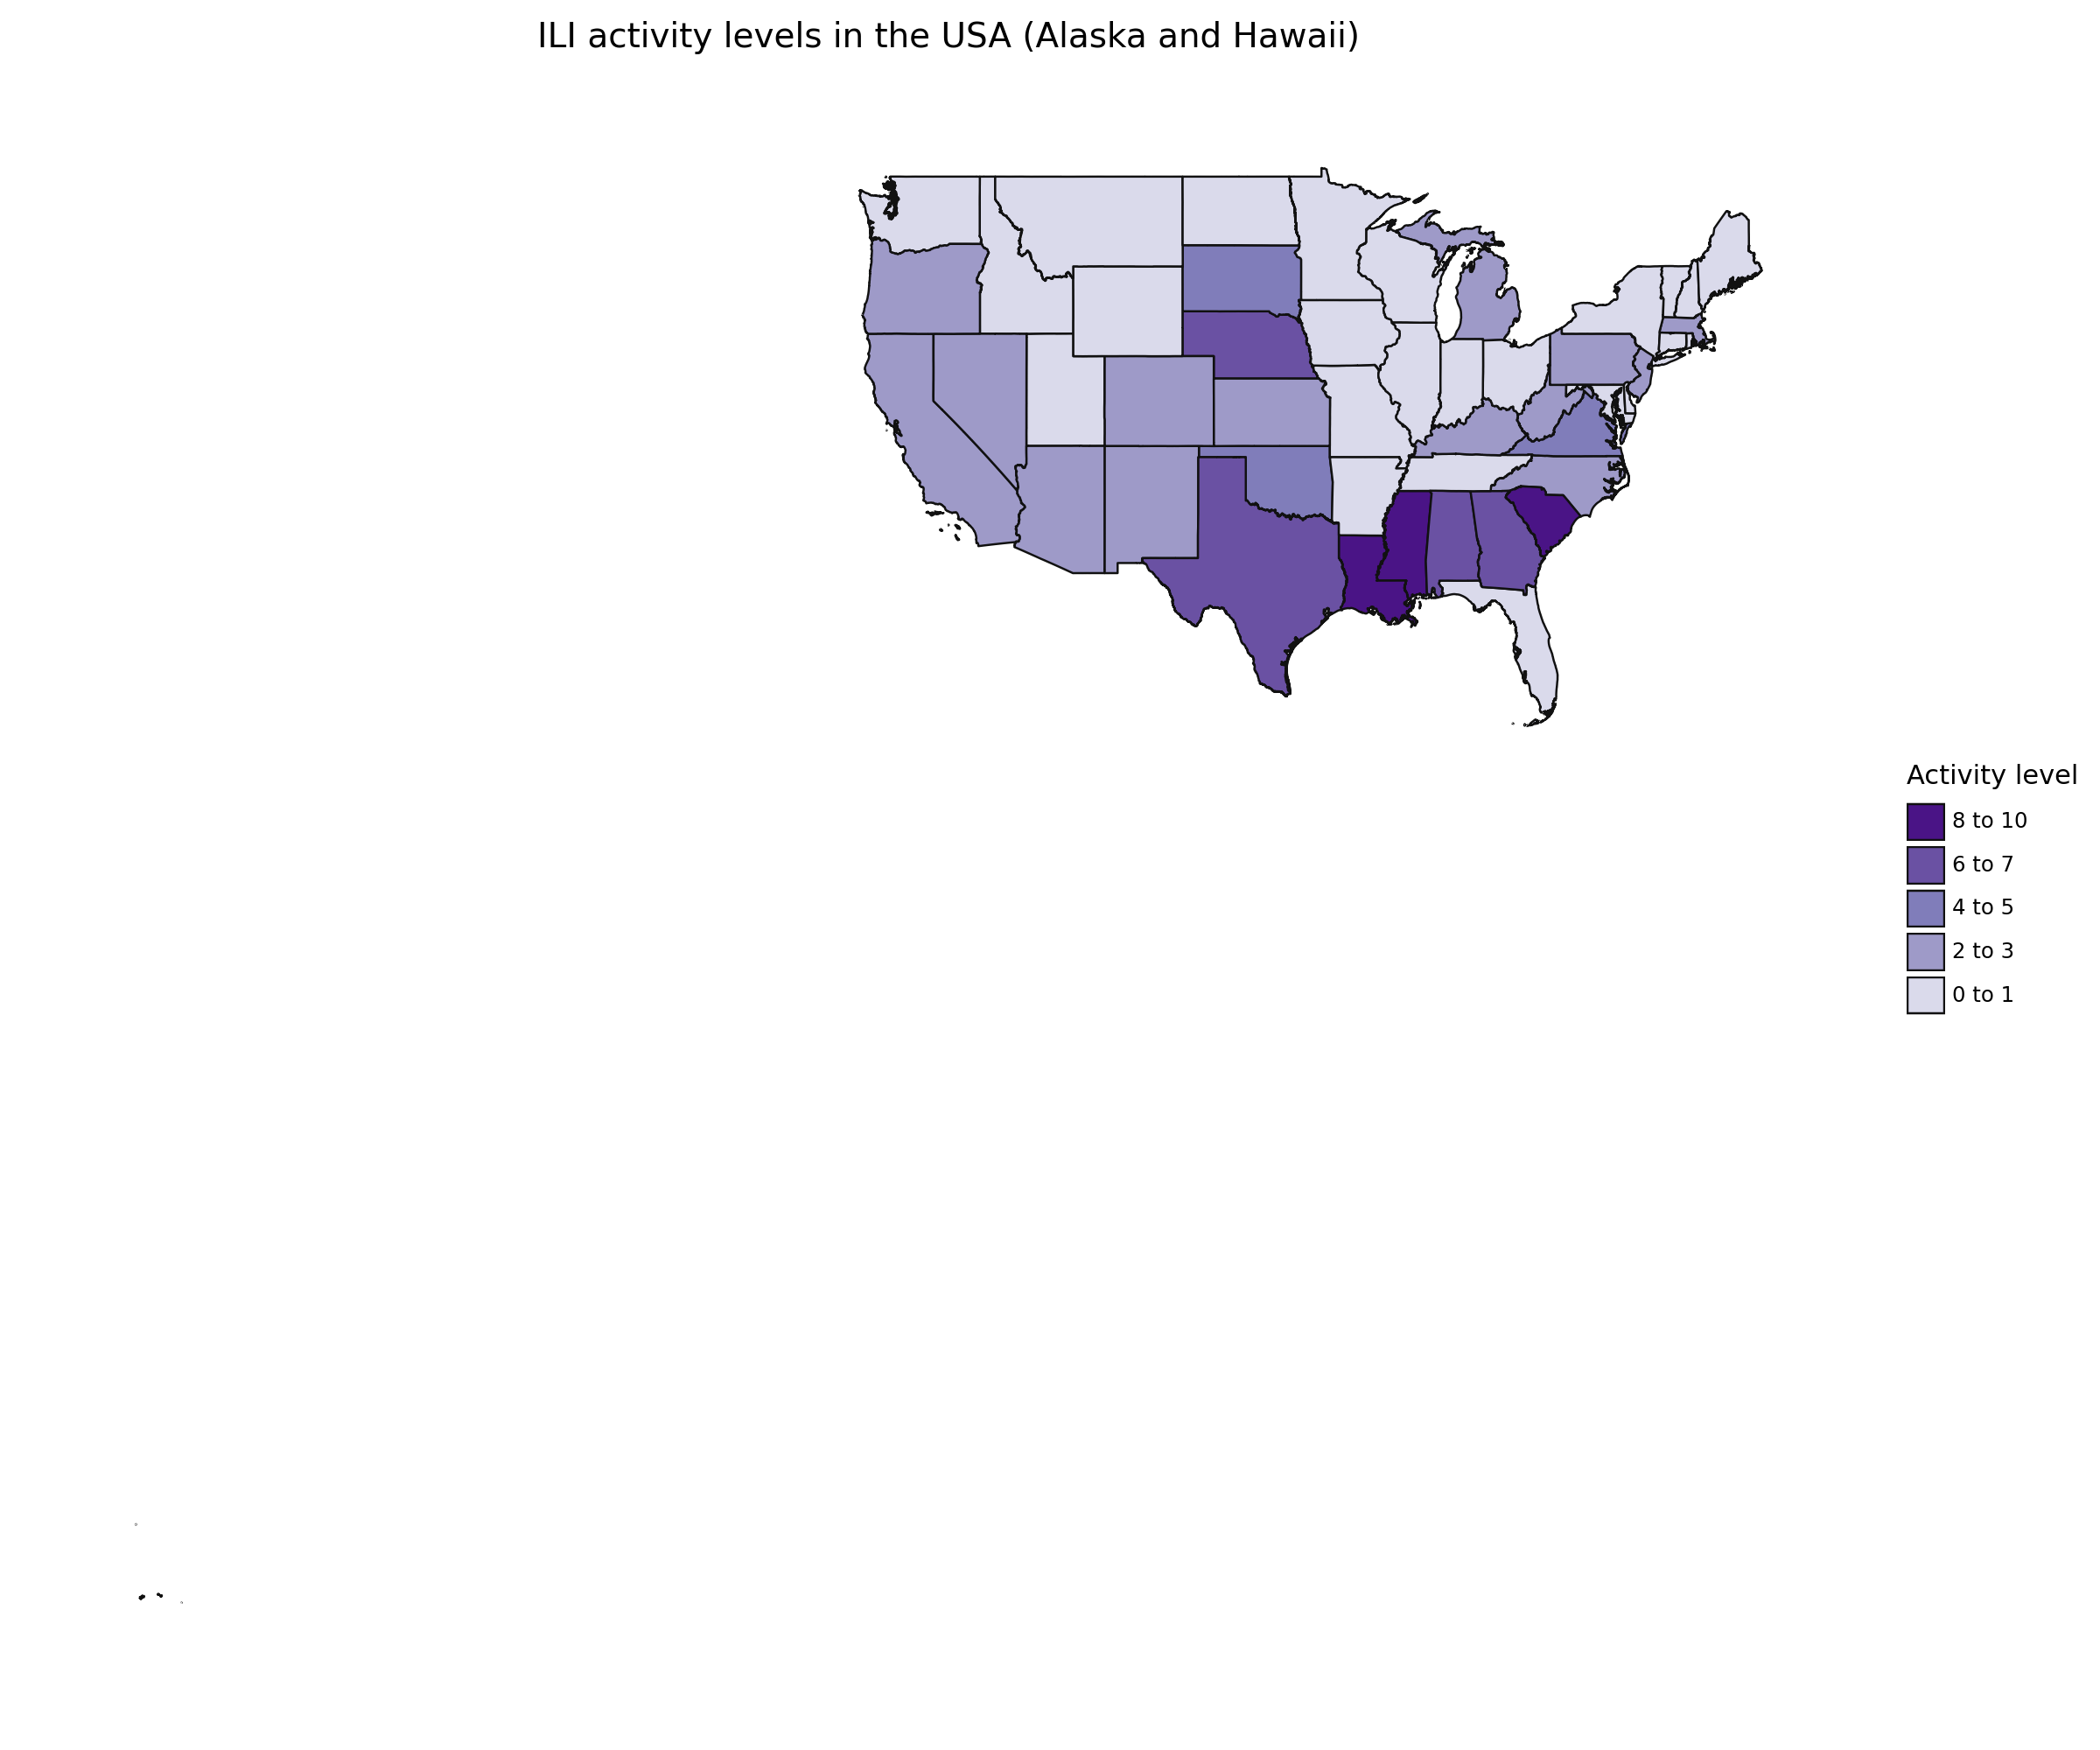

In [127]:
from jenkspy import JenksNaturalBreaks


# Perform Jenks natural breaks classification
jnb = JenksNaturalBreaks(5)
jnb.fit(merged_data["activity_level"])

# Calculate quantile values
quantile_val = np.quantile(merged_data["activity_level"].dropna(), [0.49, 0.8, 0.915, 0.94])

# Define conditions for classification
conditions = [
    merged_data["activity_level"].lt(quantile_val[0]),
    (merged_data["activity_level"].ge(quantile_val[0]) & merged_data["activity_level"].lt(quantile_val[1])),
    (merged_data["activity_level"].ge(quantile_val[1]) & merged_data["activity_level"].lt(quantile_val[2])),
    (merged_data["activity_level"].ge(quantile_val[2]) & merged_data["activity_level"].lt(quantile_val[3])),
    merged_data["activity_level"].ge(quantile_val[3])
]

# Define the respective choices
choices = [
    f"0 to {int(quantile_val[0])}",
    f"{int(quantile_val[0])+1} to {int(quantile_val[1])}",
    f"{int(quantile_val[1])+1} to {int(quantile_val[2])}",
    f"{int(quantile_val[2]) + 1} to {int(quantile_val[3])}",
    f"{int(quantile_val[3])+1} to 10"
]

# Add the new column 'N_count' with classified data
merged_data["N_count"] = pd.Categorical(np.select(conditions, choices), categories=choices[::-1])
p2 = (ggplot(merged_data)
      + geom_map(aes(fill="N_count"))
      + scale_fill_manual(values=col_use[::-1], name="Activity level")
      + labs(title="ILI activity levels in the USA (Alaska and Hawaii)")
      + theme(panel_background=element_rect(fill="white"),
              axis_ticks=element_blank(),
              axis_text=element_blank(),
              plot_title=element_text(size=14, hjust=0.5) ,
              figure_size=(12, 10))) 
# Print the visual p2
print(p2)



We're making plots to show how active something is, and the levels range from 1 to 10. At first, we divided them into groups of 2, and then we tried a smarter way to group them using the Jenks algorithm. Surprisingly, the plot with the simpler groups  seems to show a bit more detail for our data. 